Importing libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# Read data and split into train-val

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
X_train, X_val, y_train, y_val = model_selection.train_test_split(train_df.iloc[:, 0:-2], train_df.iloc[:, -1:], test_size=0.1, random_state = 0)
X_test, y_test = test_df.iloc[:, 0:-2], test_df.iloc[:, -1:]

print(f'Original training data shape: {train_df.shape}, Original Testing data shape: {test_df.shape}')
print(f'Shape of training data after splitting into training-validation ---> training data x: {X_train.shape}, training data y: {y_train.shape}, validation data x: {X_val.shape}, validation data y: {y_test.shape}'
)
print(f'Testing data shape -> test x: {X_test.shape}, test y: {y_test.shape}')

Original training data shape: (7352, 563), Original Testing data shape: (2947, 563)
Shape of training data after splitting into training-validation ---> training data x: (6616, 561), training data y: (6616, 1), validation data x: (736, 561), validation data y: (2947, 1)
Testing data shape -> test x: (2947, 561), test y: (2947, 1)


Naive Bayes with different distributions

In [7]:
gauss_naive_bayes = GaussianNB().fit(X_train, y_train.values.ravel())
gauss_naive_bayes_score = metrics.accuracy_score(y_test.values.ravel(), gauss_naive_bayes.predict(X_test))

bernoulli_naive_bayes = BernoulliNB().fit(X_train, y_train.values.ravel())
bernoulli_naive_bayes_score = metrics.accuracy_score(y_test.values.ravel(), bernoulli_naive_bayes.predict(X_test))

print(gauss_naive_bayes_score, bernoulli_naive_bayes_score)

0.7427892772310825 0.8479809976247031


# NAIVE BAYES WITH PCA
- Since PCA provides independent features, ideally we expect Naive Bayes to perform somewhat better

Number of dimensions for variance 0.5 = 1
Gaussian Naive Bayes - Default parameters - Validation set score: 0.4388586956521739, Test set score: 0.4696301323379708
Number of dimensions for variance 0.6 = 1
Gaussian Naive Bayes - Default parameters - Validation set score: 0.4388586956521739, Test set score: 0.4696301323379708
Number of dimensions for variance 0.7 = 3
Gaussian Naive Bayes - Default parameters - Validation set score: 0.7391304347826086, Test set score: 0.7485578554462164
Number of dimensions for variance 0.8 = 10
Gaussian Naive Bayes - Default parameters - Validation set score: 0.8695652173913043, Test set score: 0.8408551068883611
Number of dimensions for variance 0.9 = 34
Gaussian Naive Bayes - Default parameters - Validation set score: 0.8953804347826086, Test set score: 0.8713946386155412
Number of dimensions for variance 0.95 = 67
Gaussian Naive Bayes - Default parameters - Validation set score: 0.9089673913043478, Test set score: 0.8744485917882593
Number of dimensio

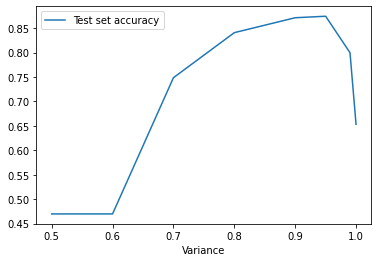

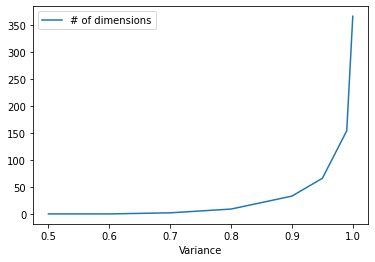

In [101]:
variances = [.5, .6, .70, .80, .9, .95, .99, .9999]
components = []
accuracies = []


for desired_variance in variances:
    pca = PCA(n_components=desired_variance)
    pca = pca.fit(X_train)
    X_train_pca, X_val_pca, X_test_pca = pca.transform(X_train), pca.transform(X_val), pca.transform(X_test)
    print(f'Number of dimensions for variance {desired_variance} = {len(pca.explained_variance_ratio_)}')
    
    naive_bayes = GaussianNB().fit(X_train_pca, y_train.values.ravel())
    val_score = metrics.accuracy_score(y_val.values.ravel(), naive_bayes.predict(X_val_pca))
    test_score = metrics.accuracy_score(y_test.values.ravel(), naive_bayes.predict(X_test_pca))

    print(f'Gaussian Naive Bayes - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
    components.append(len(pca.explained_variance_ratio_))
    accuracies.append(test_score)
    
pca_performance_df = pd.DataFrame(
     {
         'Variance': variances,
         '# of dimensions': components,
         'Test set accuracy': accuracies
     }
)
pca_performance_df.plot(x ='Variance', y='Test set accuracy', kind = 'line')
plt.show()

pca_performance_df.plot(x ='Variance', y='# of dimensions', kind = 'line')
plt.show()

Number of dimensions for variance 0.5 = 1
Gaussian Naive Bayes - Default parameters - Validation set score: 0.34782608695652173, Test set score: 0.3498473023413641
Number of dimensions for variance 0.6 = 1
Gaussian Naive Bayes - Default parameters - Validation set score: 0.34782608695652173, Test set score: 0.3498473023413641
Number of dimensions for variance 0.7 = 3
Gaussian Naive Bayes - Default parameters - Validation set score: 0.654891304347826, Test set score: 0.6901934170342722
Number of dimensions for variance 0.8 = 10
Gaussian Naive Bayes - Default parameters - Validation set score: 0.7866847826086957, Test set score: 0.8042076688157448
Number of dimensions for variance 0.9 = 34
Gaussian Naive Bayes - Default parameters - Validation set score: 0.8383152173913043, Test set score: 0.8408551068883611
Number of dimensions for variance 0.95 = 67
Gaussian Naive Bayes - Default parameters - Validation set score: 0.8777173913043478, Test set score: 0.8585001696640652
Number of dimensi

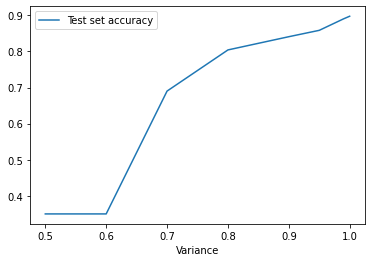

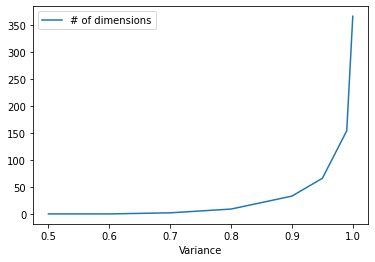

In [8]:
variances = [.5, .6, .70, .80, .9, .95, .99, .9999]
components = []
accuracies = []


for desired_variance in variances:
    pca = PCA(n_components=desired_variance)
    pca = pca.fit(X_train)
    X_train_pca, X_val_pca, X_test_pca = pca.transform(X_train), pca.transform(X_val), pca.transform(X_test)
    print(f'Number of dimensions for variance {desired_variance} = {len(pca.explained_variance_ratio_)}')
    
    naive_bayes = BernoulliNB().fit(X_train_pca, y_train.values.ravel())
    val_score = metrics.accuracy_score(y_val.values.ravel(), naive_bayes.predict(X_val_pca))
    test_score = metrics.accuracy_score(y_test.values.ravel(), naive_bayes.predict(X_test_pca))

    print(f'Gaussian Naive Bayes - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
    components.append(len(pca.explained_variance_ratio_))
    accuracies.append(test_score)
    
pca_performance_df = pd.DataFrame(
     {
         'Variance': variances,
         '# of dimensions': components,
         'Test set accuracy': accuracies
     }
)
pca_performance_df.plot(x ='Variance', y='Test set accuracy', kind = 'line')
plt.show()

pca_performance_df.plot(x ='Variance', y='# of dimensions', kind = 'line')
plt.show()